In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)

In [2]:
df = pd.read_csv("odi_batting_rankings.csv")

In [3]:
df.head()

,Rating,Player,country_code,career_best_rating_date,career_best_rating_opnt,Career_Best_ODI_Ranking
0,845,Daryl Mitchell,NZ,18/01/2026,"v India,","1v West Indies,on16/11/2025"
1,795,Virat Kohli,IND,12/07/2018,"v England,","1v Australia,on30/10/2013"
2,764,Ibrahim Zadran,AFG,14/10/2025,"v Bangladesh,","2v Bangladesh,on14/10/2025"
3,757,Rohit Sharma,IND,06/07/2019,"v Sri Lanka,","1v Australia,on25/10/2025"
4,723,Shubman Gill,IND,24/09/2023,"v Australia,","1v Sri Lanka,on02/11/2023"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rating                   100 non-null    int64 
 1   Player                   100 non-null    object
 2   country_code             100 non-null    object
 3   career_best_rating_date  100 non-null    object
 4   career_best_rating_opnt  100 non-null    object
 5   Career_Best_ODI_Ranking  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [5]:
df.describe()

,Rating
count,100.000000
mean,533.590000
std,97.645834
min,410.000000
25%,445.000000
50%,517.000000
75%,595.000000
max,845.000000


In [6]:
df.isnull().sum()

Rating                     0
Player                     0
country_code               0
career_best_rating_date    0
career_best_rating_opnt    0
Career_Best_ODI_Ranking    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

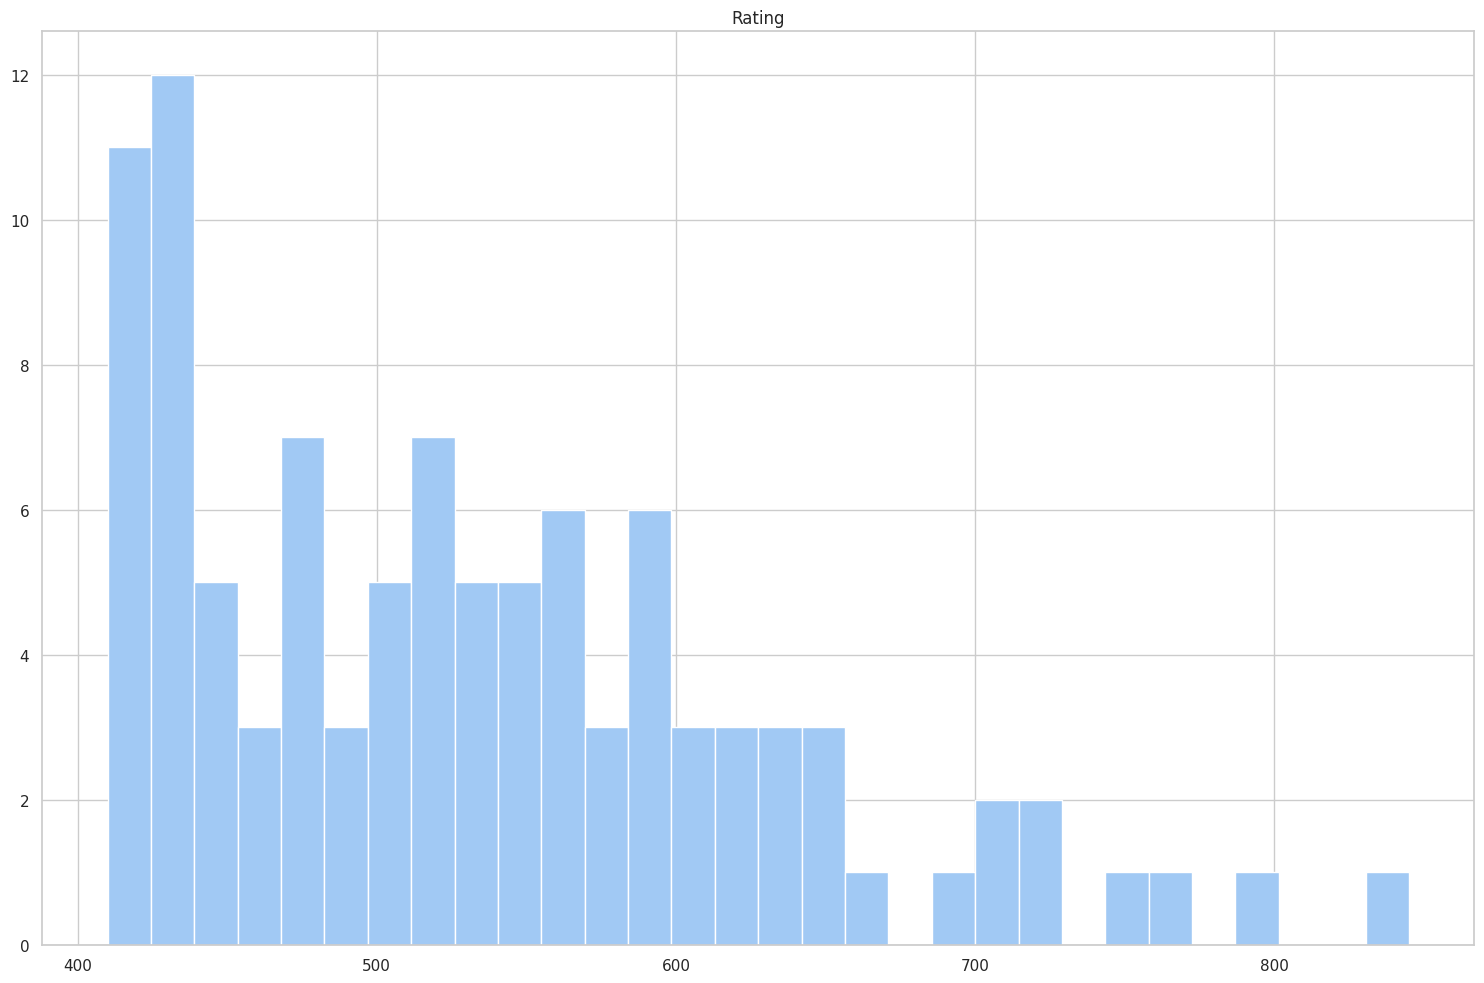

In [9]:
df[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

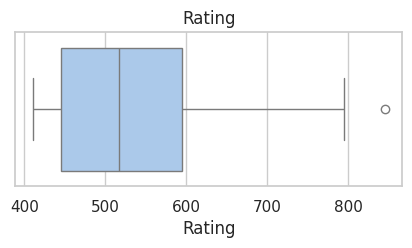

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

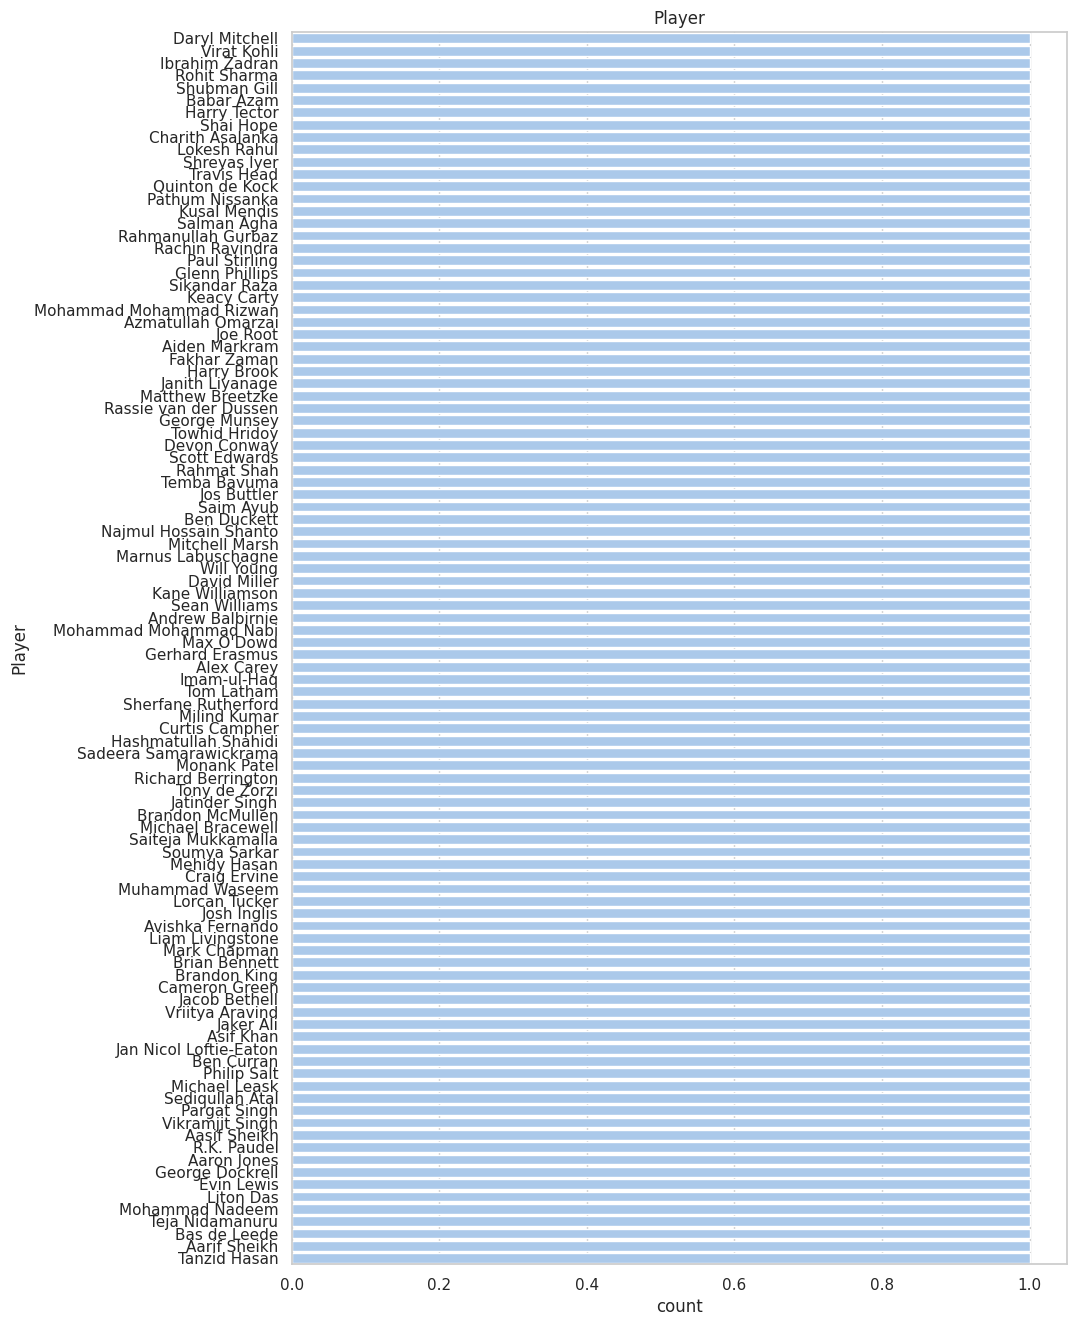

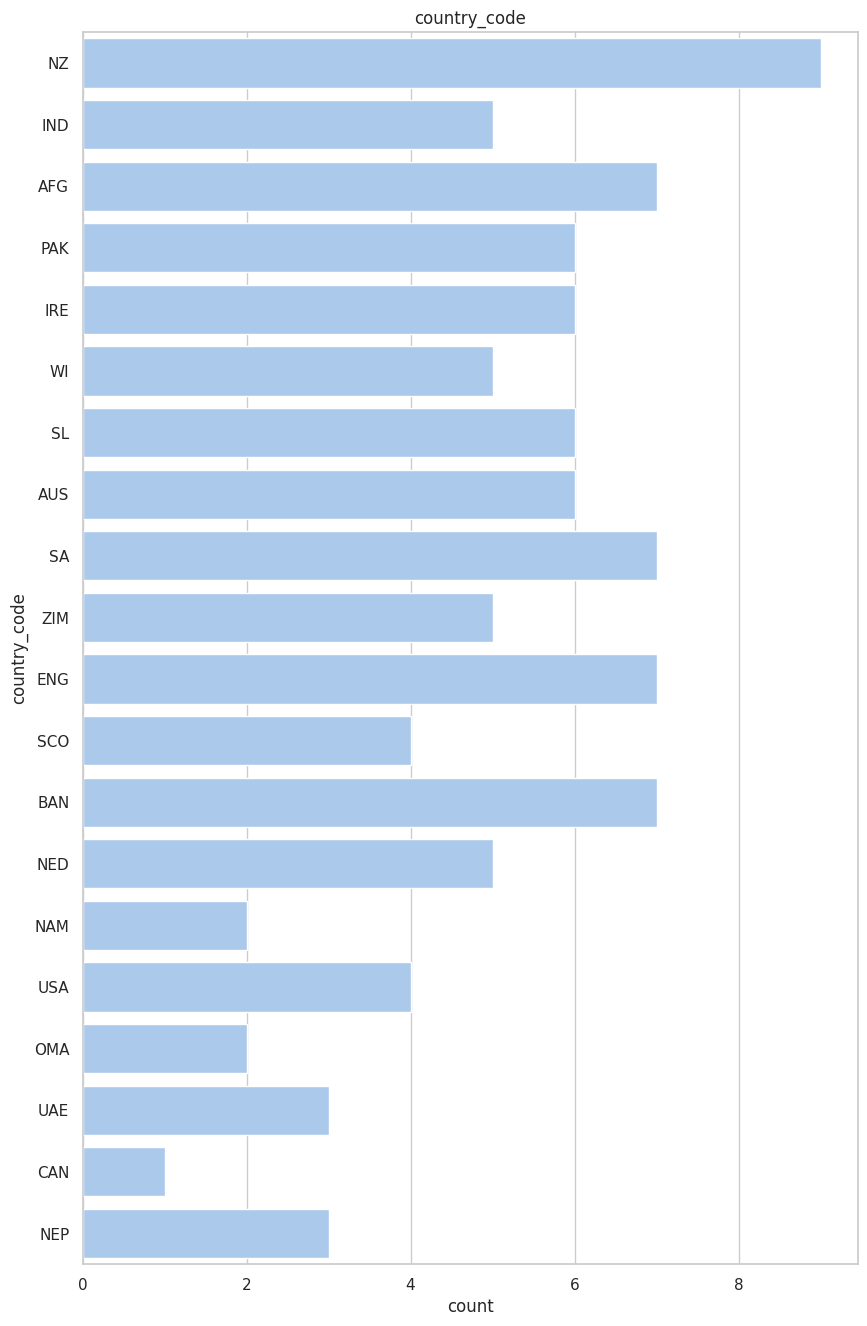

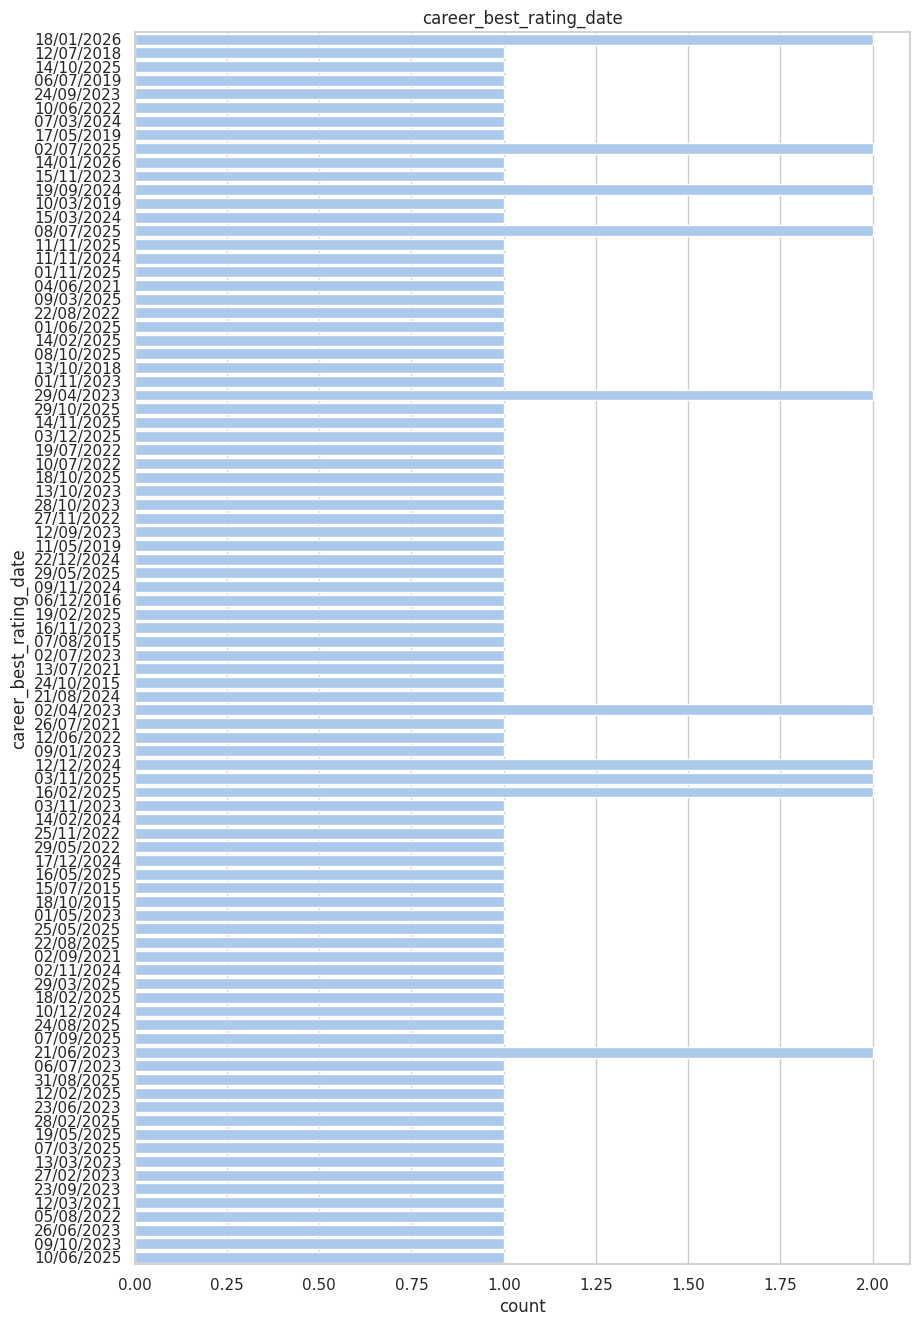

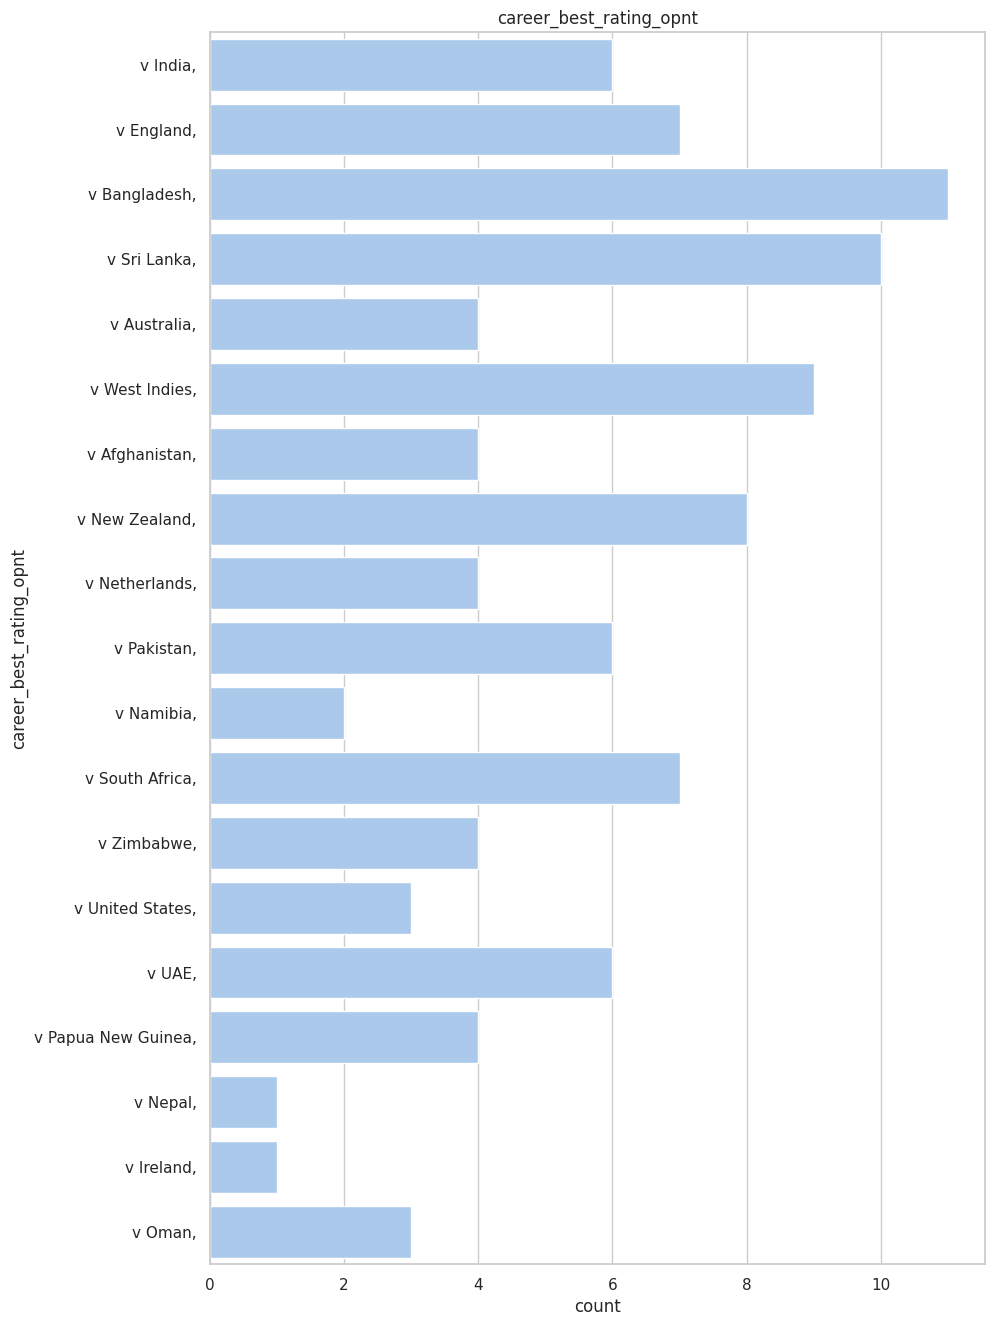

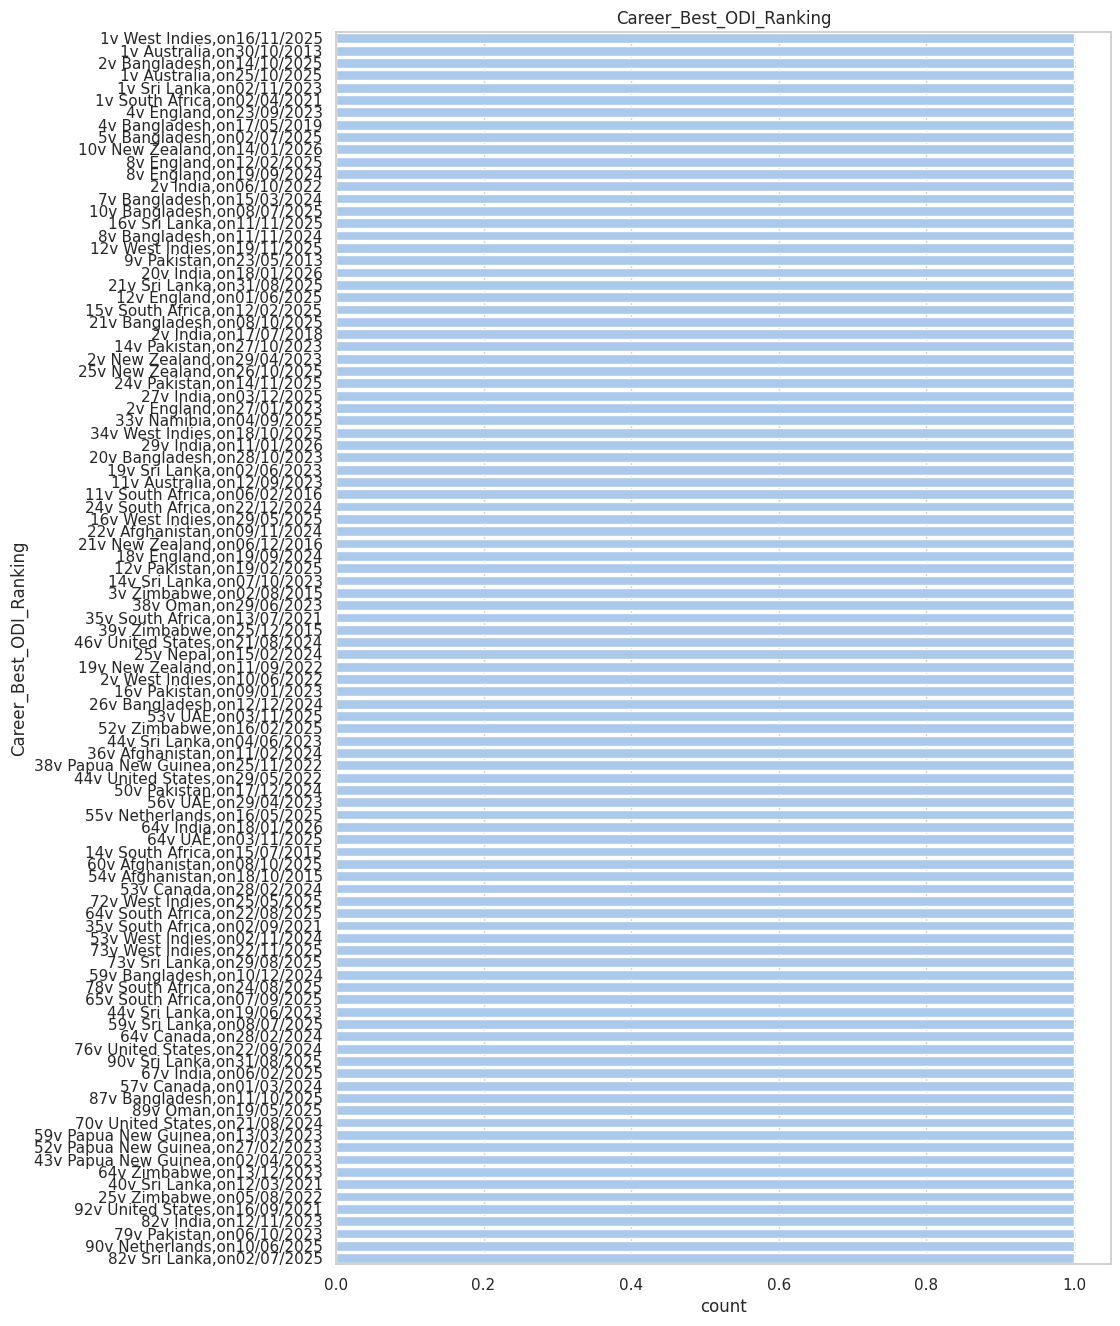

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(10, 16))
    sns.countplot(y=col, data=df)
    plt.title(col)
    plt.show()

In [16]:
df.sort_values(by="Rating").head(10)

,Rating,Player,country_code,career_best_rating_date,career_best_rating_opnt,Career_Best_ODI_Ranking
99,410,Tanzid Hasan,BAN,02/07/2025,"v Sri Lanka,","82v Sri Lanka,on02/07/2025"
98,412,Aarif Sheikh,NEP,10/06/2025,"v Netherlands,","90v Netherlands,on10/06/2025"
97,416,Bas de Leede,NED,09/10/2023,"v New Zealand,","79v Pakistan,on06/10/2023"
96,417,Teja Nidamanuru,NED,26/06/2023,"v West Indies,","82v India,on12/11/2023"
95,419,Mohammad Nadeem,OMA,21/06/2023,"v UAE,","92v United States,on16/09/2021"
93,420,Evin Lewis,WI,12/03/2021,"v Sri Lanka,","40v Sri Lanka,on12/03/2021"
94,420,Liton Das,BAN,05/08/2022,"v Zimbabwe,","25v Zimbabwe,on05/08/2022"
91,421,Aaron Jones,USA,02/04/2023,"v Papua New Guinea,","43v Papua New Guinea,on02/04/2023"
92,421,George Dockrell,IRE,23/09/2023,"v England,","64v Zimbabwe,on13/12/2023"
90,421,R.K. Paudel,NEP,27/02/2023,"v Papua New Guinea,","52v Papua New Guinea,on27/02/2023"


In [18]:
df["country_code"].value_counts()

country_code
NZ     9
AFG    7
SA     7
ENG    7
BAN    7
PAK    6
AUS    6
IRE    6
SL     6
IND    5
ZIM    5
WI     5
NED    5
SCO    4
USA    4
UAE    3
NEP    3
NAM    2
OMA    2
CAN    1
Name: count, dtype: int64

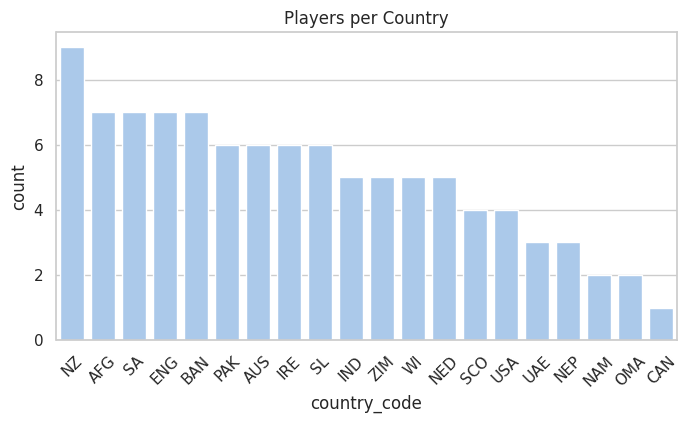

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(x="country_code", data=df, order=df["country_code"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Players per Country")
plt.show()


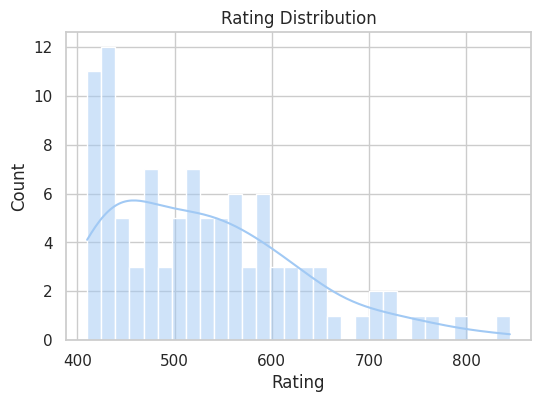

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Rating"], bins=30, kde=True)
plt.title("Rating Distribution")
plt.show()

In [23]:
df.groupby("country_code")["Rating"].mean().sort_values(ascending=False)

country_code
IND    720.200000
PAK    601.166667
SL     582.666667
NZ     572.000000
AFG    570.000000
SA     567.428571
IRE    540.833333
WI     534.200000
AUS    525.000000
ENG    514.428571
ZIM    495.200000
SCO    492.750000
NAM    476.000000
USA    475.000000
BAN    474.142857
NED    467.000000
OMA    450.500000
UAE    446.000000
CAN    430.000000
NEP    418.666667
Name: Rating, dtype: float64

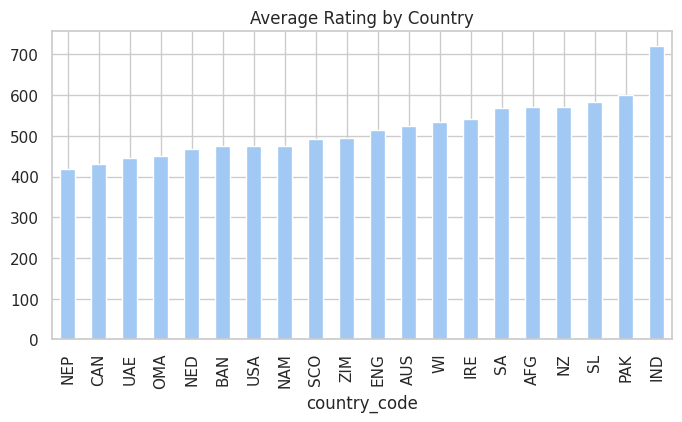

In [25]:
plt.figure(figsize=(8, 4))
df.groupby("country_code")["Rating"].mean().sort_values().plot(kind="bar")
plt.title("Average Rating by Country")
plt.show()
